In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
online_retail = fetch_ucirepo(id=352) 
  
# data (as pandas dataframes) 
X = online_retail.data.features 
y = online_retail.data.targets 


### Data cleaning

In [12]:
X.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Analyzing the product performance of 'WHITE HANGING HEART T-LIGHT HOLDER'

In [15]:
import seaborn as sns

/var/folders/fx/dlcjt8q50hl113tcb7c09cjm0000gn/T/ipykernel_82932/1367934314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['InvoiceDate'] = pd.to_datetime(X['InvoiceDate'])
/var/folders/fx/dlcjt8q50hl113tcb7c09cjm0000gn/T/ipykernel_82932/1367934314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Total Revenue'] = X['Quantity'] * X['UnitPrice']


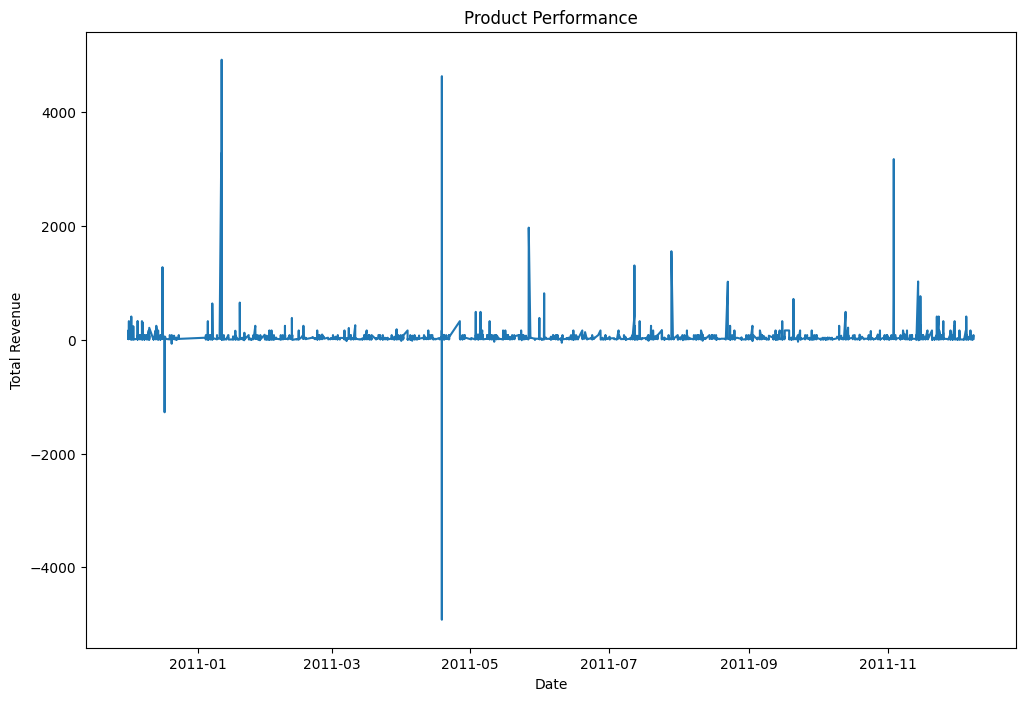

In [16]:
X['InvoiceDate'] = pd.to_datetime(X['InvoiceDate'])

X['Total Revenue'] = X['Quantity'] * X['UnitPrice']

selected_product = 'WHITE HANGING HEART T-LIGHT HOLDER'
product_df = X[X['Description'] == selected_product]

product_performance = product_df.groupby('InvoiceDate')['Total Revenue'].sum().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(x='InvoiceDate', y='Total Revenue', data=product_performance)
plt.title('Product Performance')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

### Different Products performances

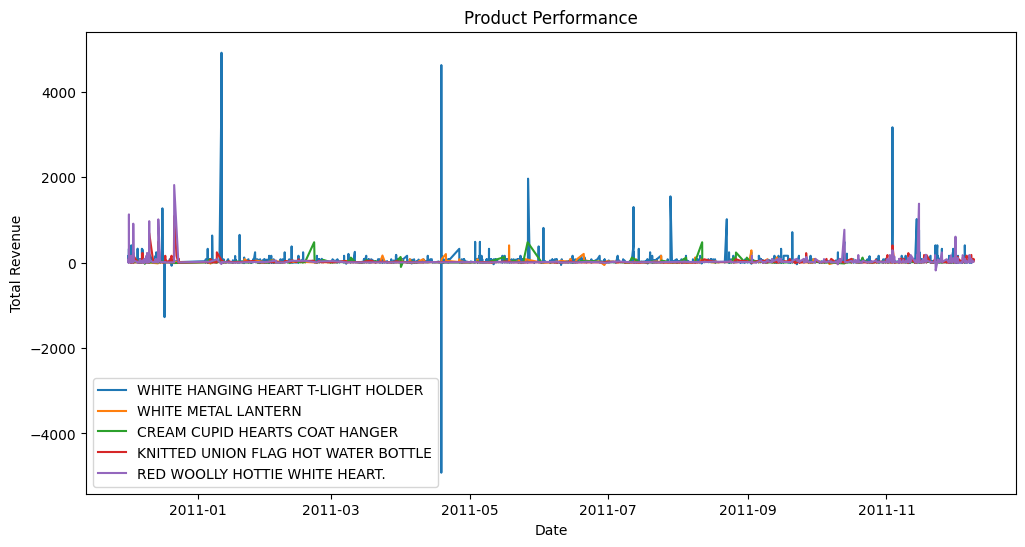

In [32]:
selected_products = ['WHITE HANGING HEART T-LIGHT HOLDER','WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE','RED WOOLLY HOTTIE WHITE HEART.']
products_df = X[X['Description'].isin(selected_products)]

products_performance = products_df.groupby(['InvoiceDate', 'Description'])['Total Revenue'].sum().reset_index()

plt.figure(figsize=(12,6))

for product in selected_products:
    product_performance = products_performance[products_performance['Description'] == product]
    sns.lineplot(x='InvoiceDate', y='Total Revenue', data=product_performance, label=product)

plt.title('Product Performance')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

### Identifying trends in the retail

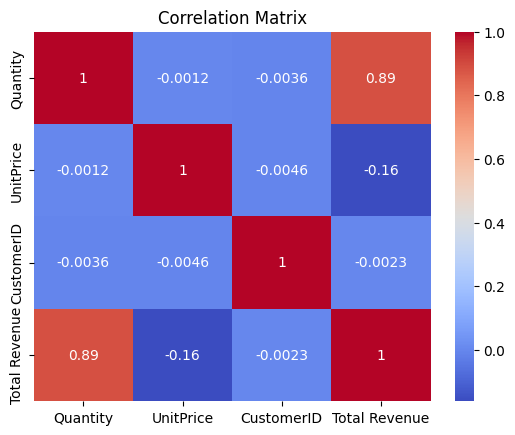

In [18]:
corr_df = X[['Quantity', 'UnitPrice', 'CustomerID', 'Total Revenue']].corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We can see that theres a correlation between the quantity sold and the total revenue which is obvious so theres no real insight in this matrix.